## Dimension Reduction - PCA 
우선 차원은 데이터가 가지고 있는 기능 또는 변수의 수를 의미한다. 실제 데이터는 유사한 데이터가 많이 존재하고 노이즈가 포함되어 있는 경우가 많다. 따라서 차원 축소를 통해 불필요한 노이즈를 제거하고 데이터 처리 속도와 성능 향상을 이룬다. 차원 축소는 데이터 시각화, 노이즈 제거, 메모리 절약, 성능 향상에 기여한다. 

대표적인 차원 축소 알고리즘으로 PCA를 사용한다. PCA는 여러 변수들 사이의 분산, 공분산 관계를 이용하여 데이터의 손실을 최소화 하면서 데이터를 가장 잘 설명하는 변수의 선형 조합을 찾아낸다. 
PCA는 데이터를 나열하고, 나열된 데이터의 중심을 원점으로 이동, 데이터를 가장 잘 표현하는 직선들을 찾고, 데이터를 투영시키는 과정을 진행한다.
#### iris data 확인

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [143]:
df = pd.read_csv('data/iris_sample_data.csv', header=None, names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', "Specis"])
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Specis
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [144]:
df = df[['Sepal Length', 'Sepal Width']]
df.head()

,Sepal Length,Sepal Width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


Text(0.5, 1.0, 'Sepal Length versus Width')

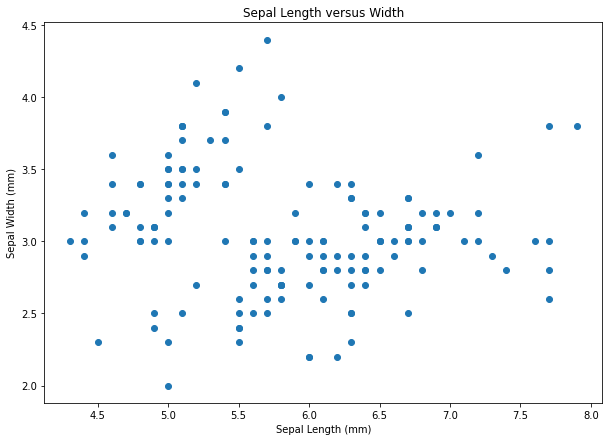

In [145]:
plt.figure(figsize=(10, 7))
plt.scatter(df['Sepal Length'], df['Sepal Width'])
plt.xlabel('Sepal Length (mm)')
plt.ylabel('Sepal Width (mm)')
plt.title('Sepal Length versus Width')

pandas 

In [146]:
df.mean()

Sepal Length    5.843333
Sepal Width     3.054000
dtype: float64

In [147]:
df.std()

Sepal Length    0.828066
Sepal Width     0.433594
dtype: float64

In [148]:
df.var()

Sepal Length    0.685694
Sepal Width     0.188004
dtype: float64

In [149]:
df.cov()

,Sepal Length,Sepal Width
Sepal Length,0.685694,-0.039268
Sepal Width,-0.039268,0.188004


numpy

In [150]:
np.mean(df.values, axis=0)

array([5.84333333, 3.054     ])

In [151]:
np.std(df.values, axis=0)

array([0.82530129, 0.43214658])

In [152]:
np.var(df.values, axis=0)

array([0.68112222, 0.18675067])

In [153]:
np.cov(df.values.T)

array([[ 0.68569351, -0.03926846],
       [-0.03926846,  0.18800403]])

#### Eigenvectors, Eigenvalues

In [154]:
eigenvectors, eigenvalues, _ = np.linalg.svd(df.values, full_matrices=False)

In [155]:
eigenvalues

array([81.25483015,  6.96796793])

In [156]:
eigenvalues = np.cumsum(eigenvalues)
eigenvalues

array([81.25483015, 88.22279808])

In [157]:
eigenvectors

array([[-0.07553027, -0.11068158],
       [-0.07052087, -0.06007995],
       [-0.06946245, -0.09874988],
       [-0.06780439, -0.09257869],
       [-0.07500106, -0.13001654],
       [-0.08106887, -0.14194824],
       [-0.06949767, -0.13083793],
       [-0.07387221, -0.10451038],
       [-0.06448827, -0.0802363 ],
       [-0.07108529, -0.07283303],
       [-0.07994002, -0.11644208],
       [-0.07168494, -0.11767416],
       [-0.06942723, -0.06666184],
       [-0.06395906, -0.09957127],
       [-0.08600784, -0.12837377],
       [-0.08717191, -0.18596798],
       [-0.08106887, -0.14194824],
       [-0.07553027, -0.11068158],
       [-0.08378535, -0.1094495 ],
       [-0.07722355, -0.14894082],
       [-0.07824674, -0.07818284],
       [-0.07665912, -0.13618774],
       [-0.07062652, -0.15634409],
       [-0.07440141, -0.08517542],
       [-0.07168494, -0.11767416],
       [-0.0716145 , -0.05349806],
       [-0.07387221, -0.10451038],
       [-0.0766239 , -0.10409969],
       [-0.07605947,

In [158]:
eigenvectors.shape

(150, 2)

In [168]:
P = eigenvectors[0]
P

array([0.07817635, 0.99693955])

#### PCA

In [169]:
data = np.cov(df.values.T)
data

array([[ 0.68569351, -0.03926846],
       [-0.03926846,  0.18800403]])

In [170]:
eigenvectors, eigenvalues, _ = np.linalg.svd(data, full_matrices=False)

In [171]:
eigenvectors

array([[-0.99693955,  0.07817635],
       [ 0.07817635,  0.99693955]])

In [172]:
eigenvalues

array([0.6887728 , 0.18492474])

In [173]:
eigenvalues = np.cumsum(eigenvalues)
eigenvalues /= eigenvalues.max()
eigenvalues

array([0.78834238, 1.        ])

In [180]:
P = eigenvectors[0]
P

array([-0.99693955,  0.07817635])

In [181]:
X_T_P = P.dot(df.values.T)
X_T_P

array([-4.81077444, -4.65047471, -4.43545153, -4.34357521, -4.70326285,
       -5.07858577, -4.32012231, -4.71889812, -4.15982257, -4.64265708,
       -5.09422104, -4.51951021, -4.55078076, -4.05231098, -5.46954395,
       -5.33857945, -5.07858577, -4.81077444, -5.38548526, -4.78732154,
       -5.11767394, -4.79513917, -4.30448703, -4.82640971, -4.51951021,
       -4.75016867, -4.71889812, -4.9104684 , -4.91828603, -4.43545153,
       -4.54296312, -5.11767394, -4.86356259, -5.15482681, -4.64265708,
       -4.73453339, -5.20955026, -4.64265708, -4.15200494, -4.81859208,
       -4.71108049, -4.30642234, -4.13636967, -4.71108049, -4.78732154,
       -4.55078076, -4.78732154, -4.33575758, -4.99452708, -4.72671576,
       -6.72841249, -6.13024876, -6.63653617, -5.30336189, -6.26121325,
       -5.46366162, -6.02273717, -4.69738052, -6.35308957, -4.97300948,
       -4.82834502, -5.64741426, -5.80964929, -5.8546198 , -5.35615003,
       -6.43714826, -5.34833239, -5.57117321, -6.0090372 , -5.38

Text(0, 0.5, 'componet value')

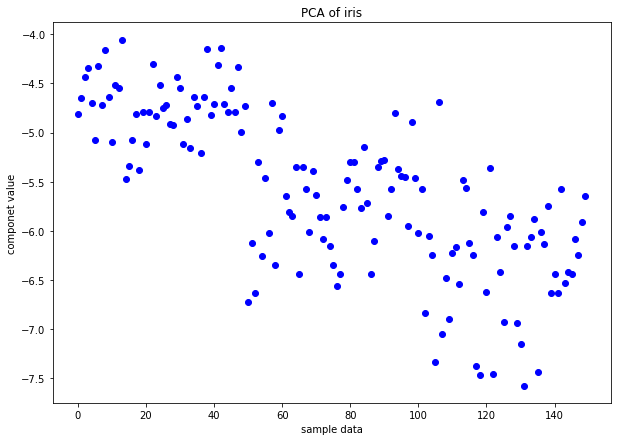

In [182]:
plt.figure(figsize=(10, 7))
plt.plot(X_T_P, 'bo')
plt.title('PCA of iris')
plt.xlabel('sample data')
plt.ylabel('componet value')